In [3]:
import pyten as ptn
import numpy as np
import sys, csv, os   
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.dirname("../codes/src")))          #used this, be careful
print(sys.path)

['/home/m/Mert.Kurttutan/Academia/Codes/Physics/Projects/qh_fm_01/notebooks', '/project/theorie/s/Sam.Mardazad/Group/build/avx/ext_pypdir', '', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python37.zip', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/lib-dynload', '/software/opt/bionic/x86_64/python/3.7-2019.07/lib/python3.7/site-packages/IPython/extensions', '/home/m/Mert.Kurttutan/.ipython', '/home/m/Mert.Kurttutan/Academia/Codes/Physics/Projects/qh_fm_01/codes', '/home/m/Mert.Kurttutan/Academia/Codes/Physics/Projects/qh_fm_01/codes']


In [4]:
from src import helpers, utils, DMRG

In [5]:
helpers.

SyntaxError: invalid syntax (<ipython-input-5-14f584db66f9>, line 1)

Start with presentation of data stored in .dat file for a given

In [6]:
#parameters for the state to explained below
p = helpers.params();
p.target = "../codes" + "/data/dat-files-01-DMRG-table/"                 #the location dat files are stored
p.Lx=6; p.Ly=4; p.Nphi=12.; p.U=8.; p.N=int(p.Nphi); p.S=p.Nphi/2*0;

helpers.print_DMRG_table(p)

DMRG Table for Lx6_Ly4_Nphi12.0_U8.0_N12_S0.0 - 40 sweeps for each bond dim - 80 sweeps for 2 stages

|     Variance |   Bond Dimension |   Energy Difference |         Energy |   Time for one stage |
|--------------+------------------+---------------------+----------------+----------------------|
| 0.1796549249 |              100 |      -23.2351350624 | -23.2351350624 |        57.5987069607 |
| 0.1797865524 |              100 |       -0.0000178442 | -23.2351529066 |        56.1464753151 |
| 0.4185283860 |              200 |       -0.0549947828 | -23.2901476894 |       129.8929884434 |
| 0.4120494144 |              200 |       -0.0010503192 | -23.2911980086 |       112.0125112534 |
| 0.0295609952 |              400 |       -0.1467705055 | -23.4379685141 |       321.9593961239 |
| 0.0295582372 |              400 |       -0.0000005404 | -23.4379690545 |       313.6718084812 |
| 0.0295585922 |              400 |       -0.0000000271 | -23.4379690817 |       308.7944033146 |
| 0.0020156059 |

In [7]:
#spin-spin correlation to see long-range spin order
#load the particle density to txt file, and then to numpy array, then plot as a function of x
chis = [100, 100, 200, 200, 400, 400, 400, 800, 800, 800, 800, 1600, 1600, 1600, \
        2000, 2000, 2000, 4000, 4000, 4000, 4000, 4000, 4000]
p1=helpers.params()
p1.folder="QH_FM4"; p1.Lx=16; p1.Ly=5; p1.Nphi=(p1.Lx-1)/5*p1.Ly; p1.U=8.0; p1.N=12; p1.S=float(p1.N/2)*0; p1.pbc=True; 
p1.lat=ptn.mp.lat.su2u1.genFermiHubbardSpinCharge(p1.Lx*p1.Ly)

In [8]:
tar_loc_corr="../codes/data/dat-files-02-expc-arr/corr-func-arr/"

tar_loc_n="../codes/data/dat-files-02-expc-arr/n-arr/"

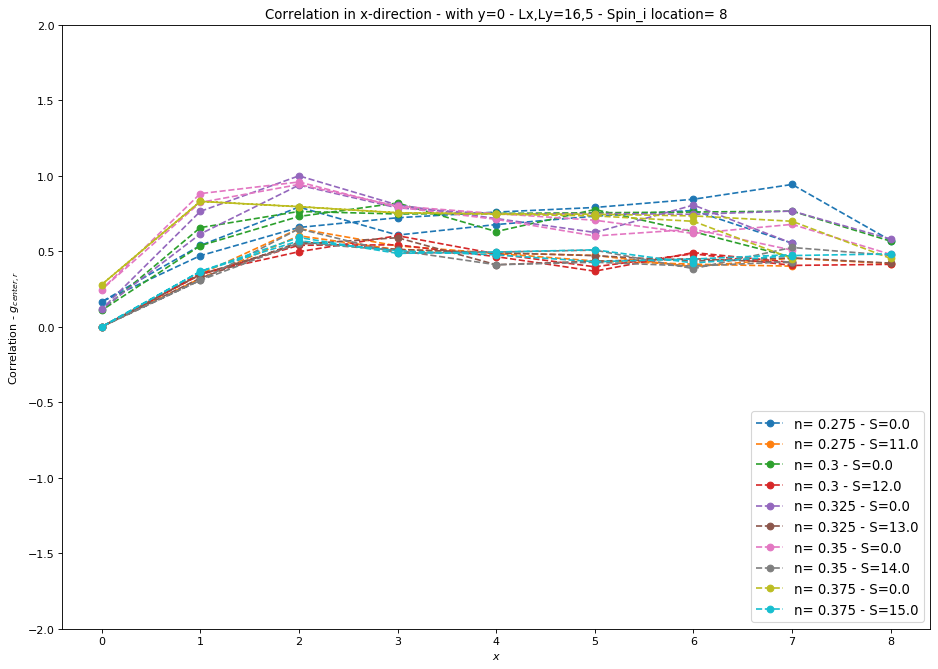

In [9]:
#plot
c_locs=[0, p1.Lx-1, p1.Lx//2]
plt.figure(figsize=(14, 10), dpi=80)
for M in np.arange(22, 32, 2):
    for s in range(2):
        for i in range(len(c_locs)-2):
            p1.N=M; i=2
            p1.S=float(p1.N/2)*s
            SS=helpers.load_arr_high_bond(p1, tar_loc_corr, chis, "ss");
            nn=helpers.load_arr_high_bond(p1, tar_loc_corr, chis, "nn");
            n = helpers.load_arr_high_bond(p1, tar_loc_n, chis, "n")
            X = SS[i, :, 1].astype(int)
            Y = SS[i, :, 0]
            Y = np.divide(Y - 3/4*nn[i, :, 0], n[X, 0])/n[c_locs[i],0] 
            plt.plot(X, -Y, '--o',label="n= " + str(p1.N/(p1.Lx*p1.Ly))+ " - " + "S="+str(p1.S) )

        
        
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("$x$")
plt.ylabel("Correlation - $g_{center,r}$")
#plt.yscale('log')
y_lim = 2
plt.ylim(-y_lim, y_lim)
plt.title("Correlation in x-direction - with y=0 - Lx,Ly=" + str(p1.Lx)+ "," + str(p1.Ly)  + " - Spin_i location= " + str(c_locs[i]))
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc ="lower right", prop={'size':12})
#plt.axhline(y=0.0, color='r', linestyle='-')

  
# To load the display window
plt.show()